<a href="https://colab.research.google.com/github/Aadil404/Music-Emotion-Recognition/blob/main/notebooks/01_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Navigate to your project directory (adjust the path if needed)
%cd /content/drive/MyDrive/MER(final-year-project)/

# 3. Install necessary libraries
!pip install librosa tensorflow pandas scikit-learn matplotlib seaborn

Mounted at /content/drive
/content/drive/MyDrive/MER(final-year-project)


In [ ]:
import pandas as pd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the metadata
metadata_path = 'data/emotify_dataset/cleaned_metadata_multilabel_30percent.csv'
df = pd.read_csv(metadata_path)

In [ ]:
df

,songs_path,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness
0,classical/1.mp3,0,1,0,0,1,0,0,0,1
1,classical/10.mp3,0,0,0,0,0,1,1,0,0
2,classical/100.mp3,0,1,0,0,0,1,0,0,0
3,classical/11.mp3,0,0,0,1,1,0,0,0,1
4,classical/12.mp3,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
395,rock/196.mp3,0,0,0,1,1,0,0,0,0
396,rock/197.mp3,0,0,0,0,0,0,1,0,0
397,rock/198.mp3,0,0,0,0,0,1,1,0,0
398,rock/199.mp3,1,0,0,0,0,1,0,0,0


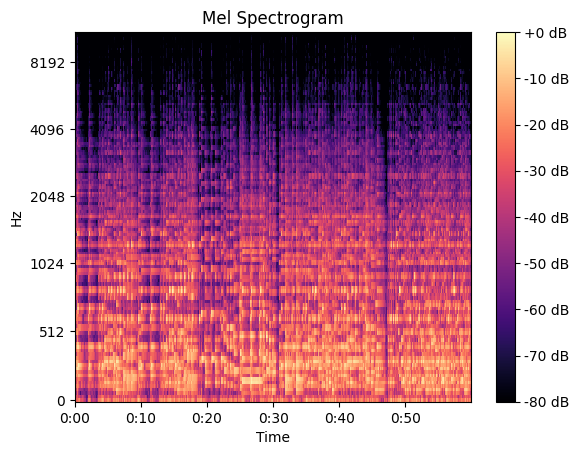

In [ ]:
# Function to create a Mel Spectrogram
def create_mel_spectrogram(audio_path):
    y, sr = librosa.load(audio_path, duration=60)  # Load audio, use first 60s
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    return log_mel_spec

# Example: Create and display a spectrogram for the first song
first_song_path = 'data/emotify_dataset/' + df.iloc[1]['songs_path']
spectrogram = create_mel_spectrogram(first_song_path)

librosa.display.specshow(spectrogram, sr=22050, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()